# BMEN 509 - Lab 1 Tutorial

#### Ibrahim Asad

#### UCID: 30088413

## Notebook Setup

### Markdown

Formula: Use latex equation notations (\$$Latex Equations\$$)  
Next line: Use double space  
Code: Use backticks \`. \`Code\`  for 3 backticks for code block
```
if i == 1
    Do this
end 
```

### Starting the notebook

1. Go to ucalgary.syzygy.ca  
2. Login using your ucalgary credentials  
3. On the Add new button (+ button on the right top corner above the files area)  
4. Open a terminal  
5. Clone the git repositories (from Dr.Curiel's github: git clone /<repository url/>) to the syzygy server. I would take the time to clone all the repositories (Labs and notebook at once). You can organize your folders using the add new folder option using GUI or use mkdir command.  
6. Always use the "RUN_PREPARATIONS.ipynb" first. This file will install all the required python libraries for the notebooks or the lab. 

### Git 
1. Clone all of the labs to a folder.
2. Open terminal and navigate to the folder.
3. Initialize git repository using the command "git init"
4. Setup your usename and email with the following commands
```
git config --global user.name "Your username"
git config --global user.email "email@email.com"
```
5. Use the status command to check the untracked files. All should be untracked.  
`git status`
6. Use add command to add files to the repository.  
`git add .`
7. Use status command again.  
8. SUe commit command to commit changes.  
`git commit -m "message"`
9. Use status command again to check if the commit worked.  
10. Add remote repository location.  
`git remote add orgin "your repository location"`
11. Check if the remote repository worked.  
`git remote -v`
12. Setup upstream for remote repository.
`git branch -u upstream/main`
13. Push any changes to github.  
`git push`
   
#### Git Issues
1. When using `git push` you might encounter an error with "unrelated histories". Use `git pull origin master --allow-unrelated-histories`
2. You might run into problem with sub modules. We will discuss that on Monday.
3. You might have to run `git pull` and commit any changes before pushing change to github.
   
   


### Objectives of this lab
1. Understand the imaging basics  
2. Representing images  
    a. Different sensors for imaging (different modalities)
    b. Continuous to discrete domain
3. Image Operations
    a.Histograms and Convolutions

In [10]:
# Library Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import signal, ndimage

# Setup Jupyter notebook specifics
%matplotlib inline

# Numpy printing help
np.set_printoptions(precision=2)

In [11]:
# Constants
data_directory = os.path.join('.', 'Data')
file_names = [
    'BreastUltrasound5.tif', 'T1Weighted8.jpg',
    'Thorax_PD.png', 'calcs_grids.tiff',
    'knee_ct2.tif', 'knee_xray2.tif',
    'mri_T2.tif', 'mri_brain.tif',
    'mri_pd.tif'
]

In [12]:
# Verify we can find our files
for file_name in file_names:
    name = os.path.join(data_directory, file_name)
    if not os.path.isfile(name):
        os.sys.exit('Cannot find file {}. Please make sure you have downloaded the data'.format(name))
print('Found all image files!')

Found all image files!


### Example 1 - Image Representation
Below, we are demonstrating the basics of image representation including creating, plotting, etc. For all our work, we will be using Numpy arrays. They are similar to MATLAB tensors except they are zero indexed. MATLAB starts counting from 1, Numpy starts counting from 0.

In [1]:
# Reading the PNG file as a grayscale
image = Image.open('Data/BreastUltrasound5.tif').convert("L")
# The array arr will have the image as an array
arr = np.asarray(image)
# We need to use imshow specifying that it is a grayscale or it will be rendered as colour
#plt.imshow(arr, cmap='gray')
plt.imshow(arr, plt.cm.gray)

Tlines=np.shape(image)[1]
Trows=np.shape(image)[1]

# Add the code to hide the tick values
plt.axis('off')

NameError: name 'Image' is not defined

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
The size of the image is: (3, 3)
There are 9 pixels in the image
Value at index (1, 2) is 0.0


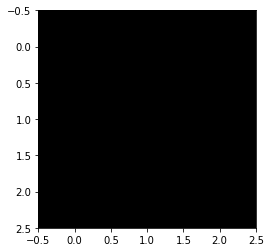

In [5]:
# Let's create a 2D image of size 3x3 with all zeros
I = np.zeros((3,3))

# We can print the contents of the image
print(I)

# We can ask the size
print('The size of the image is: {}'.format(I.shape))

# We can ask for the number of pixels
N = np.prod(I.shape)
print('There are {} pixels in the image'.format(N))

# Next, we can ask for the value at an index
print('Value at index ({}, {}) is {}'.format(1, 2, I[1,2]))

# And finally, we can show the image!
plt.imshow(I, cmap='gray')
plt.show()

In [5]:
# We can also create 3D images
J = np.zeros((3,4,5))

print('Image J has size {}'.format(J.shape))
print('Image J has dimensions {}'.format(len(J.shape)))

Image J has size (3, 4, 5)
Image J has dimensions 3


![Image Aquisition](https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/DigitalDAQv2.pdf/page1-1200px-DigitalDAQv2.pdf.jpg)  
Wikimedia: https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/DigitalDAQv2.pdf/page1-1200px-DigitalDAQv2.pdf.jpg

Reading image ./Data/mri_T2.tif
Image ./Data/mri_T2.tif has:
  65536 pixels
  size (256, 256)
  data type uint8
  dimensionality 2


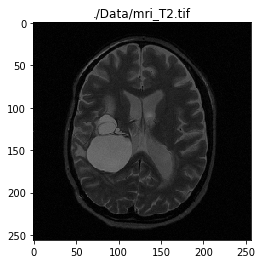

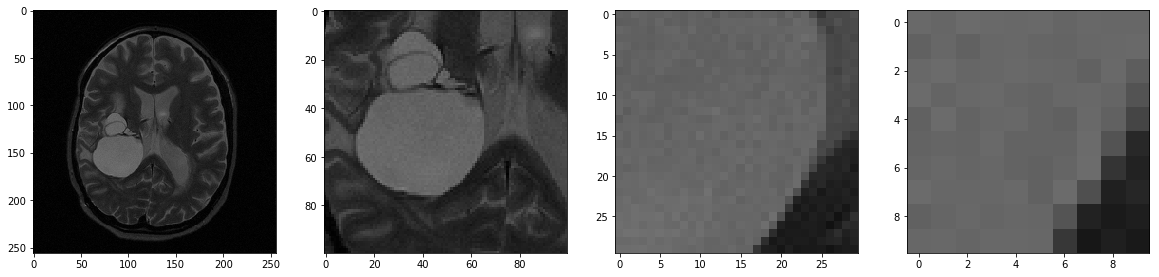

In [6]:
# Finally, we can load in images from disk. Let's load the image 'mri_T2.tif'
filename = os.path.join(data_directory, 'mri_T2.tif')

print('Reading image {}'.format(filename))
I = io.imread(filename)

# Let's the properties!
print('Image {} has:'.format(filename))
print('  {} pixels'.format(np.prod(I.shape)))
print('  size {}'.format(I.shape))
print('  data type {}'.format(np.dtype(I[0,0])))
print('  dimensionality {}'.format(len(I.shape)))

# Let's see the image!
plt.imshow(I, cmap='gray')
plt.title(filename)
plt.show()

# Let's take sub-images and see the pixelation!
plt.subplots(1, 4, figsize=(20,10))
plt.subplot(1, 4, 1); plt.imshow(I, cmap='gray', vmin=np.min(I[:]), vmax=np.max(I[:]))
plt.subplot(1, 4, 2); plt.imshow(I[100:200:1, 50:150:1], cmap='gray', vmin=np.min(I[:]), vmax=np.max(I[:]))
plt.subplot(1, 4, 3); plt.imshow(I[140:170:1, 90:120:1], cmap='gray', vmin=np.min(I[:]), vmax=np.max(I[:]))
plt.subplot(1, 4, 4); plt.imshow(I[155:165:1, 105:115:1], cmap='gray', vmin=np.min(I[:]), vmax=np.max(I[:]))
plt.show()

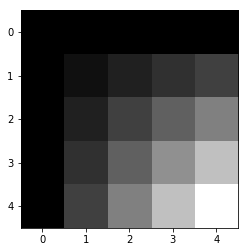

Pixel at (3, 2) has value 6.0
Pixel at (2, 3) has value 6.0
Pixel at (3, 3) has value 9.0


[[ 0.  0.  0.  0.  0.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  2.  4.  6.  8.]
 [ 0.  3.  6.  9. 12.]
 [ 0.  4.  8. 12. 16.]]


In [7]:
# Finally, let's create an image where every voxel is the product of the indicies
size = (5, 5)
J = np.zeros(size)

# We loop over all indicies
for i in range(size[0]):
    for j in range(size[1]):
        J[i, j] = i*j

# We can now plot
plt.imshow(J, cmap='gray')
plt.show()

# Did it work?
print('Pixel at ({}, {}) has value {}'.format(3, 2, J[3,2]))
print('Pixel at ({}, {}) has value {}'.format(2, 3, J[2,3]))
print('Pixel at ({}, {}) has value {}'.format(3, 3, J[3,3]))
print ("\n")
print(J)

### 3D Images
![](https://i.stack.imgur.com/5PUyK.png)  

Stack: https://softwarerecs.stackexchange.com/questions/71545/a-tool-or-software-to-draw-3d-stacked-blocks

### Example 2 - Images and Math
We can do simple math operators on images. Let's see how that works.

### Statistics in imaging
Mean: $$\mu = \frac{\Sigma\text{ intensity}}{\Sigma\text{ pixels}}$$
Standard deviation: $$E[S] = \sqrt{\frac{1}{n-1}(I_j - \mu)}$$
Signal to Noise Ratio: $$\text{SNR} = \frac{\mu}{\sigma}$$
Contrast: $$ C = |I_i - I_j|$$
Contrast to Noise Ratio: $$\text{CNR} = \frac{C}{\sigma}$$  
  
#### Remember images are 2D, 3D or even 4D (if time): Matrix operations are used for any mathematical operations


[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


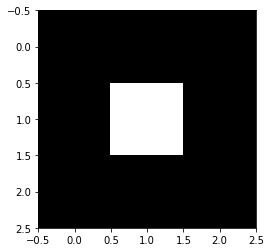

Mean of the image: 0.1111111111111111
STD of the image: 0.31426968052735443
Unbiased STD of the image 0.3333333333333333


In [8]:
# Let's get our example image up
I = np.zeros((3,3))
I[1,1]=1
print(I)

plt.imshow(I, cmap='gray')
plt.show()

print('Mean of the image: {}'.format(np.mean(I)))
print('STD of the image: {}'.format(np.std(I)))

# Notice that we got 0.314 instead of 0.33! Numpy uses the biased version of standard deviation. Let's fix that.

N = np.prod(I.shape)
print('Unbiased STD of the image {}'.format(np.sqrt(N / (N-1) * np.std(I)**2)))

# I'm sure you can figure out STD from here :)

Unbiased Standard Deviation
$$\sigma^2 = \frac{N}{N-1} E[S]^2$$

In [9]:
# Finally, let's look for our contrast to noise ratio.
I_a = I[1,1]
I_b = I[2, 1]
contrast = np.abs(I_a - I_b)

print('Contrast between index A=({}, {}) and B=({}, {}) is |{} - {}| = {}'.format(1, 1, 2, 1, I_a, I_b, contrast))

# Now contrast to noise ratio shouldn't be so hard!

Contrast between index A=(1, 1) and B=(2, 1) is |1.0 - 0.0| = 1.0


[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


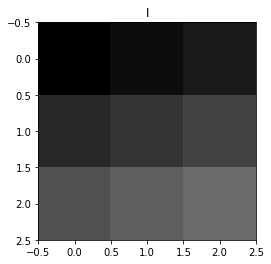

[[ 2.  4.  6.]
 [ 8. 10. 12.]
 [14. 16. 18.]]


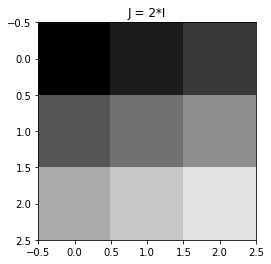

In [10]:
# Finally, we can do some math. Let's create the example from the page.
I = np.zeros((3,3))

count = 1
for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        I[i, j] = count
        count += 1
        
print(I)
plt.imshow(I, cmap='gray', vmax=20)
plt.title('I')
plt.show()

J = 2*I
print(J)
plt.imshow(J, cmap='gray', vmax=20)
plt.title('J = 2*I')
plt.show()

### Example 3 - Histograms and Transformations
Below, we're going to demonstrate some histograms.

#### What is a histogram?
1. Graphical representation of large data in smaller chunks. Divide and conquer.  
2. Divide intensities into groups. Each of the intensities are categorized into bins of a certain intensity range. 
#### Probability density function
1. Probability of occurence if each of the bin in the histogram. 
$$ Probability = \frac{\text{# elements in bin}}{\text{total elements}}$$

Reading image ./Data/mri_pd.tif


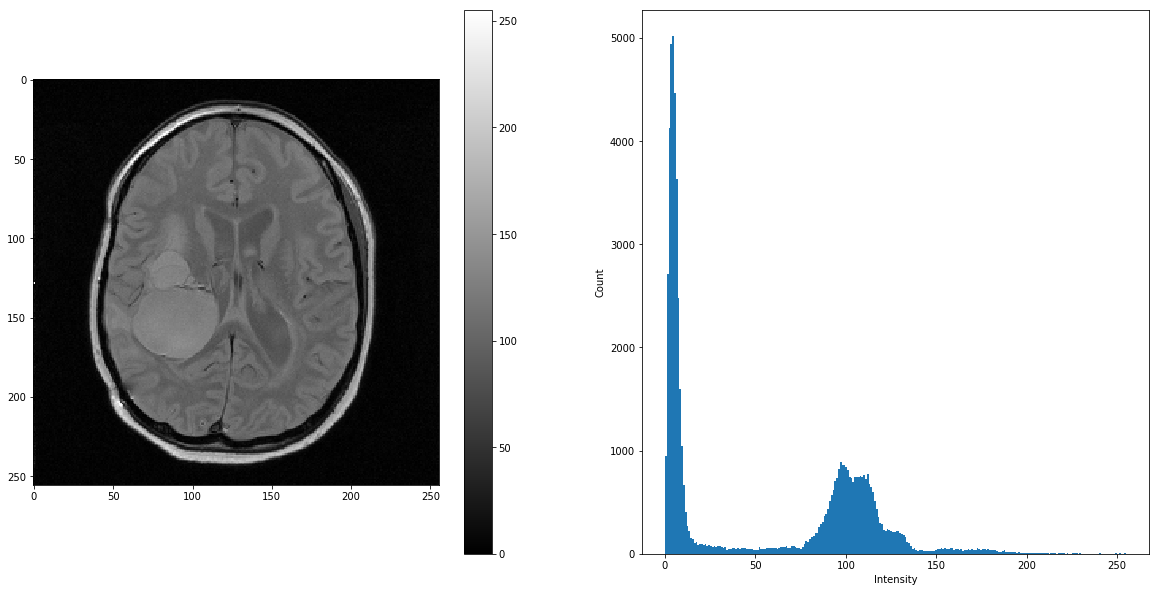

In [11]:
# First, let's just get a histogram plotting for image 'mri_pd.tif'
filename = os.path.join(data_directory, 'mri_pd.tif')

print('Reading image {}'.format(filename))
I = io.imread(filename)

plt.subplots(1, 2, figsize=(20,10))
plt.subplot(1, 2, 1); plt.imshow(I, cmap='gray'); plt.colorbar()
plt.subplot(1, 2, 2); plt.hist(I.ravel(), bins=256); plt.xlabel('Intensity'); plt.ylabel('Count')
plt.show()

# Which tissues correspond to where in the histogram?

### Window and Level
1. Visalization of the image between a range of intensities  
2. Increase the contrast of the image  
![Window and Level](NotebookImages/TransferFunction.jpg)

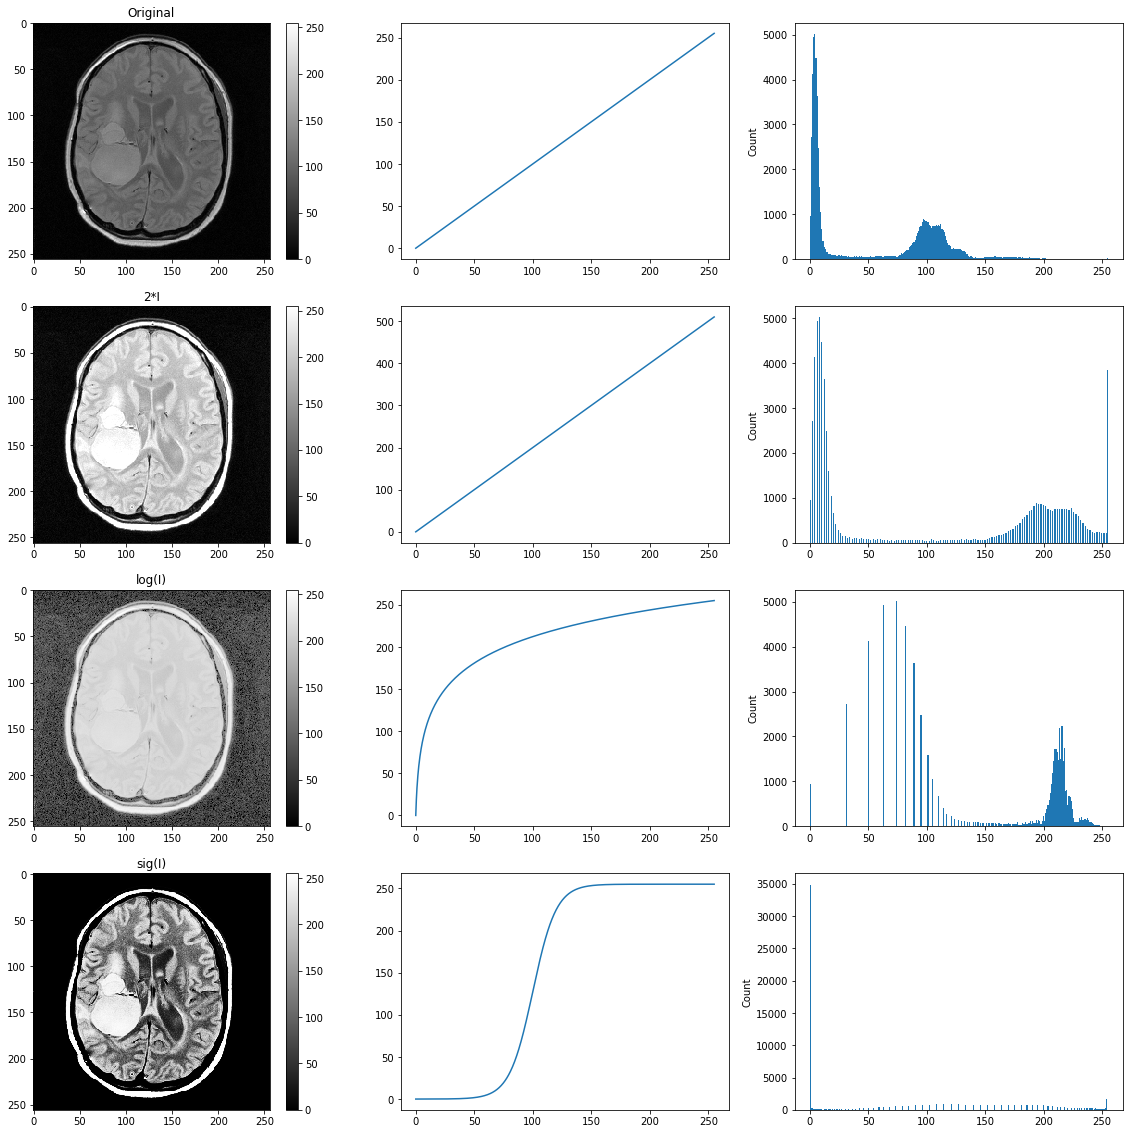

In [12]:
# Now, let's define some transfer functions!
def identity(J):
    return J

def mult_tf(J, multiple=2):
    return multiple*J

def log_tf(J, epsilon=1):
    K = np.log(J + epsilon*np.ones_like(J))
    return 255 * K / np.max(K[:])

def sig_tf(J, alpha=-0.1, beta=-100):
    K = 1.0 / (1 + np.exp(alpha*(J + beta)))
    return 255 * K / np.max(K[:])

# Let's define a plotting function
size = (4,3)
def apply_and_plot(J, func, name, count):
    # Apply function
    mi = np.min(J[:])
    ma = np.max(J[:])
    K = np.clip(func(J.astype(np.float32)), 0, 255).astype(np.uint8)
    x = np.linspace(mi, ma, 1000)
    y = func(x)
    
    # Plot Image
    plt.subplot(size[0], size[1], 3*(count-1)+1)
    plt.imshow(K, cmap='gray', vmin=mi, vmax=ma)
    plt.colorbar()
    plt.title(name)
    
    # Plot transfer function
    plt.subplot(size[0], size[1], 3*(count-1)+1+1)
    plt.plot(x,y)
    
    # Plot histogram
    plt.subplot(size[0], size[1], 3*(count-1)+1+2)
    plt.hist(K.ravel(), bins=256)
    plt.ylabel('Count')    

I_2 = 2*I
I_log = np.log(I+[1])
I_sig = 1 / (1 + np.exp(-0.1*(I - 100)))

# ... and see what we get
plt.subplots(size[0], size[1], figsize=(20,20))
apply_and_plot(I, identity, 'Original', 1)
apply_and_plot(I, mult_tf, '2*I', 2)
apply_and_plot(I, log_tf, 'log(I)', 3)
apply_and_plot(I, sig_tf, 'sig(I)', 4)
plt.show()

### Example 4 - Image Convolution
No one explains it better than the example at: http://setosa.io/ev/image-kernels/ Below, a small example is available for the purpose of demonstrating the laboratory.

### Convolution
1. Modify (shape) the current pixel with its neighbors  
$$\begin{bmatrix}1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix} * \begin{bmatrix}a & b & c \\ d & e & f \\ g & h & i \end{bmatrix} = \text{1.a + 2.b + 3.c + ......}$$

![Convolution in an image (Pixel)](https://jeanvitor.com/wp-content/uploads/2017/07/6zX2c.png)
https://jeanvitor.com/wp-content/uploads/2017/07/6zX2c.png

![convolution in an image](https://cse19-iiith.vlabs.ac.in/neigh/convolution.jpg)
https://cse19-iiith.vlabs.ac.in/neigh/convolution.jpg

2. Linear convolution: Linear and time invariant filters

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 6.   0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


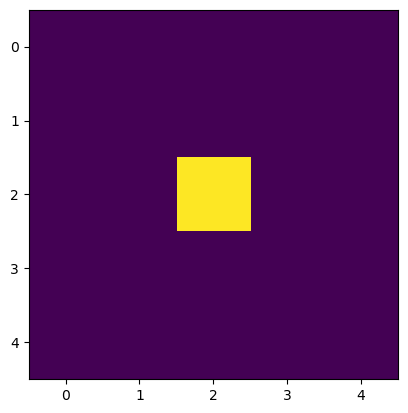

Reading image ./Data/mri_pd.tif


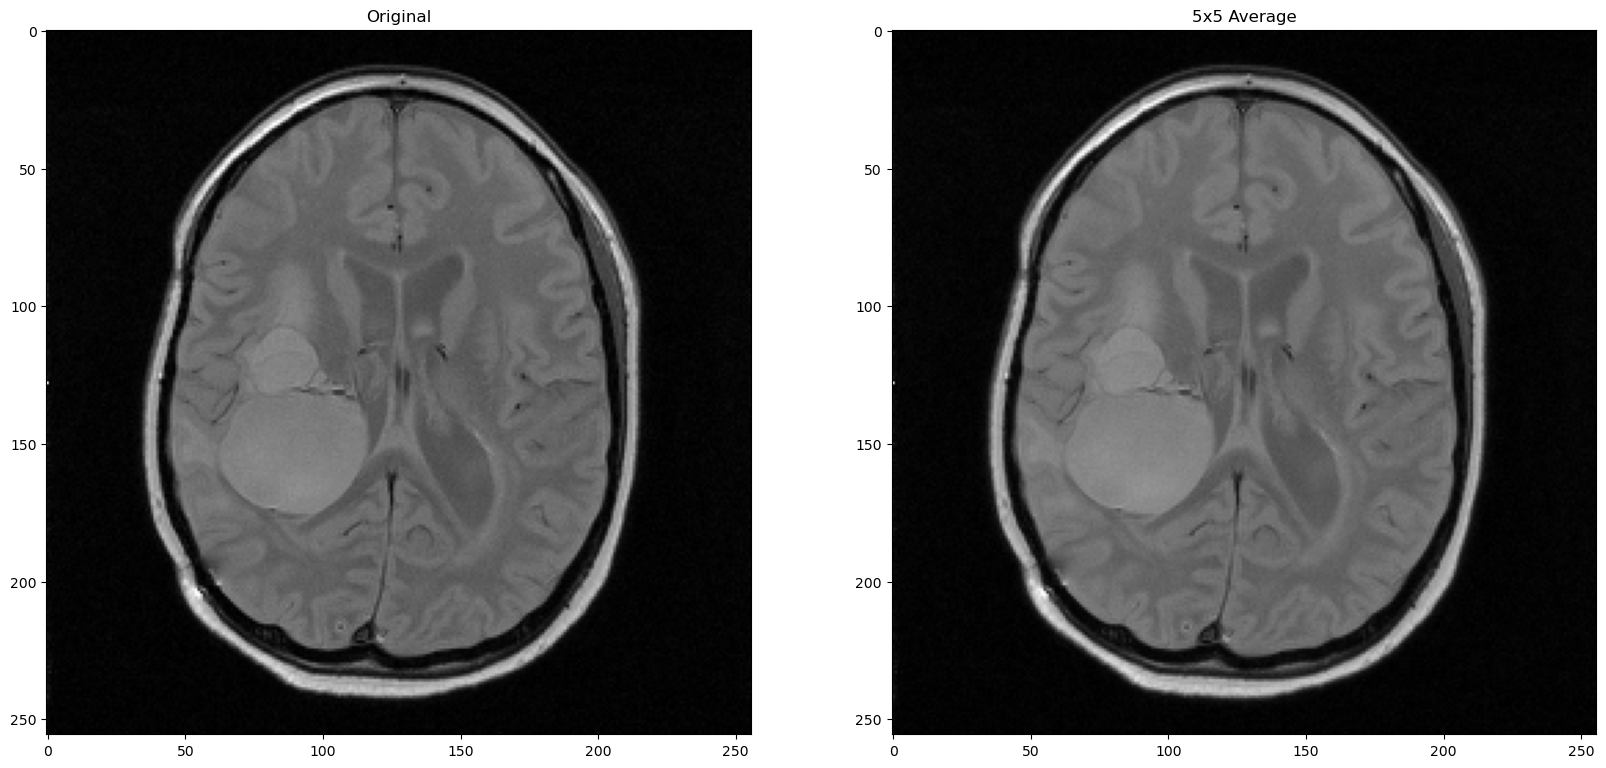

In [13]:
# Let's create our own averaging filter!
kernel = np.ones((5,5))
kernel = kernel / np.sum(kernel.ravel())
kernel[2][2] = 6

print(kernel)
plt.imshow(kernel)
plt.show()

# Read in our favorite PD image
filename = os.path.join(data_directory, 'mri_pd.tif')

print('Reading image {}'.format(filename))
I = io.imread(filename)

# Perform convolution
K = signal.convolve2d(I, kernel, boundary='pad', mode='same')

plt.subplots(1, 2, figsize=(20,20))
plt.subplot(1, 2, 1); plt.imshow(I, cmap='gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(K, cmap='gray'); plt.title('5x5 Average')
plt.show()

### Non linear Filtering
Median Filter: Remove salt and pepper noise

![Median Filter](https://www.southampton.ac.uk/~msn/book/new_demo/median/Picture1.png)
https://www.southampton.ac.uk/~msn/book/new_demo/median/Picture1.png
  
    
![Salt and Pepper noise](https://upload.wikimedia.org/wikipedia/commons/1/1d/Medianfilterp.png)
https://upload.wikimedia.org/wikipedia/commons/1/1d/Medianfilterp.png